In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from wordcloud import WordCloud
import os
import platform
from matplotlib import font_manager, rc

# 1. 저장 경로 설정
os.makedirs("results", exist_ok=True)

# 2. 한글 폰트 설정
system_name = platform.system()
if system_name == 'Windows':
    font_path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=font_path).get_name()
    rc('font', family=font_name)
elif system_name == 'Darwin': # Mac
    rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

# 3. 스타일 설정 (깔끔한 배경)
sns.set_style("whitegrid")
plt.rcParams['font.family'] = font_name # seaborn 스타일 적용 후 폰트 재설정
print("✅ 시각화 준비 완료!")

✅ 시각화 준비 완료!


✅ 저장 완료: results/distribution_pie_chart.png


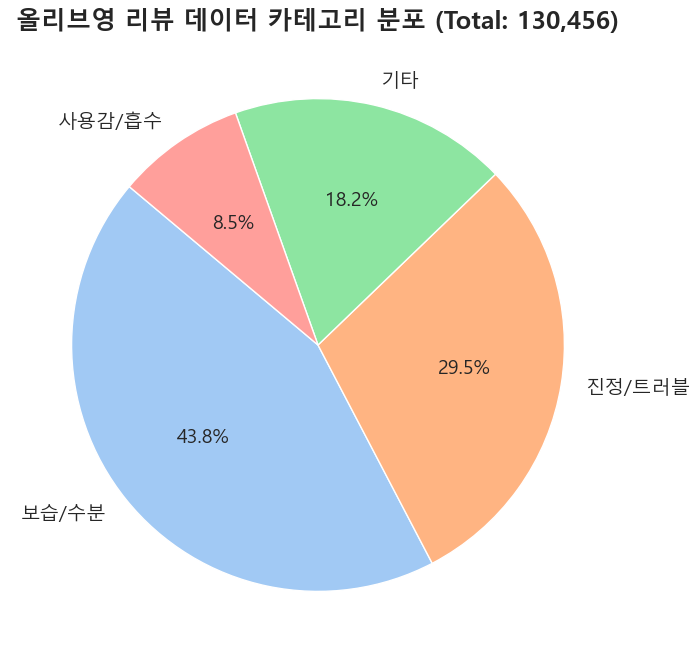

In [4]:
# 데이터 로드
df = pd.read_csv("../data/03_final/final_result.csv")

# 카테고리별 개수 계산
category_counts = df['category'].value_counts()

# 차트 그리기
plt.figure(figsize=(10, 8))
colors = sns.color_palette('pastel')[0:5] # 파스텔톤 색상

plt.pie(category_counts, labels=category_counts.index, autopct='%.1f%%',
        startangle=140, colors=colors, textprops={'fontsize': 14})

plt.title("올리브영 리뷰 데이터 카테고리 분포 (Total: 130,456)", fontsize=18, fontweight='bold')
plt.savefig("results/distribution_pie_chart.png", dpi=300, bbox_inches='tight')
print("✅ 저장 완료: results/distribution_pie_chart.png")
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_20304\2299537368.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products[category], y=top_products.index, palette=color_palette)


✅ 저장 완료: results/ranking_soothing.png


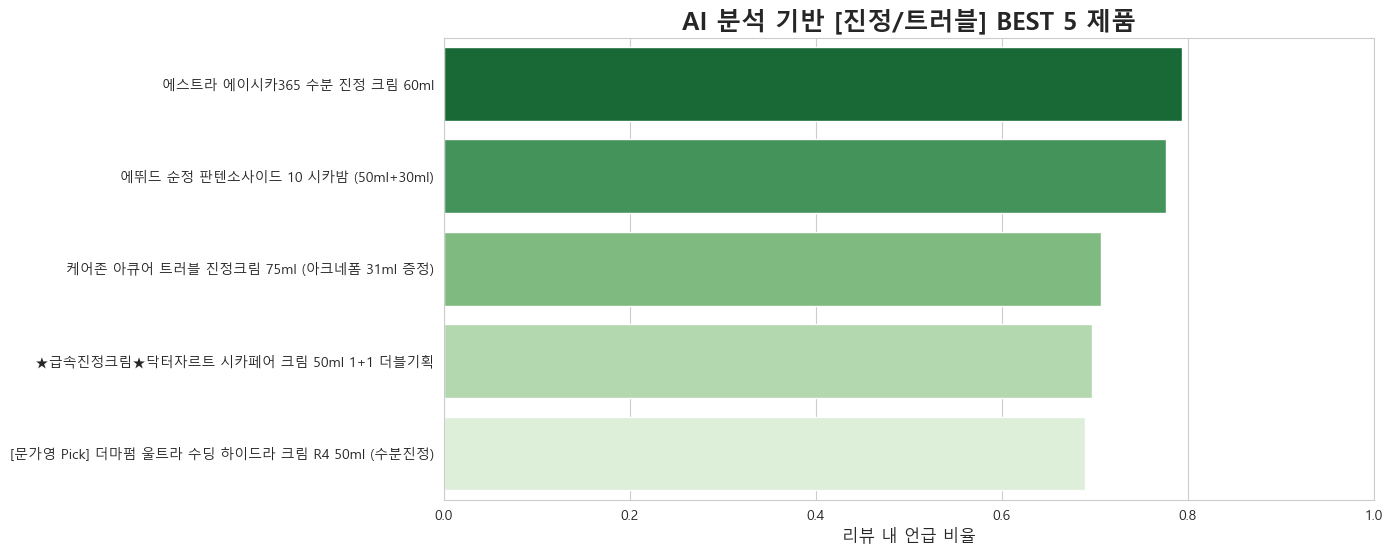

C:\Users\user\AppData\Local\Temp\ipykernel_20304\2299537368.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products[category], y=top_products.index, palette=color_palette)


✅ 저장 완료: results/ranking_moisture.png


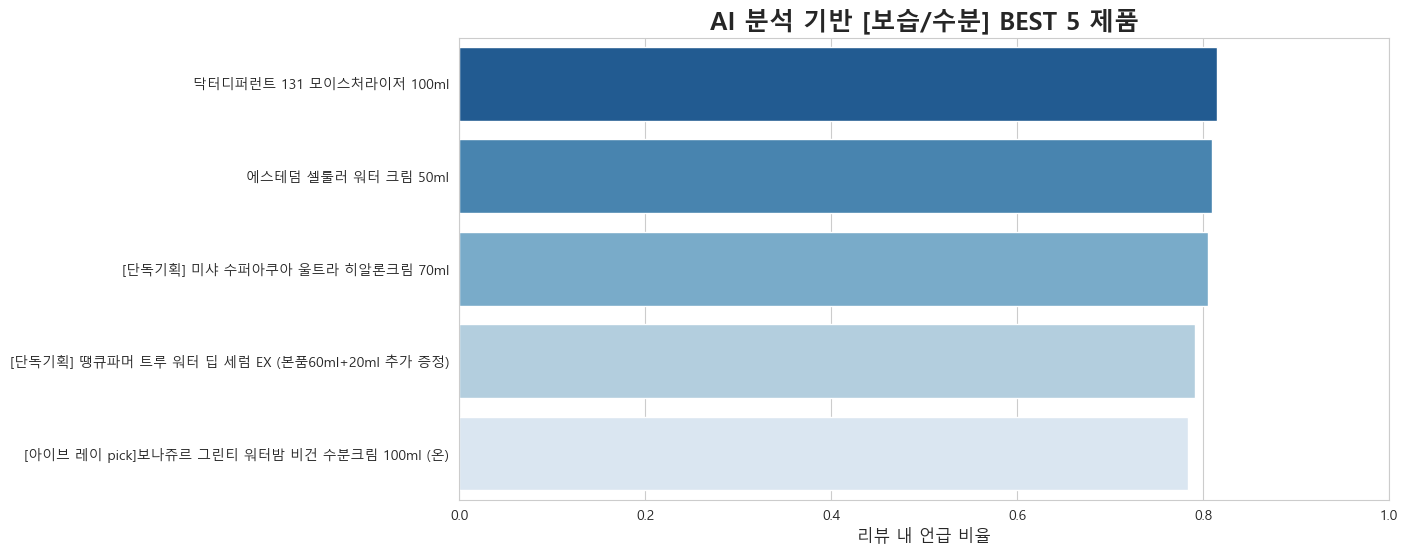

In [5]:
# 랭킹 데이터 로드 (없으면 다시 계산)
RANKING_PATH = "data/03_final/product_ranking.csv"
if os.path.exists(RANKING_PATH):
    product_ratios = pd.read_csv(RANKING_PATH, index_col=0)
else:
    # (혹시 파일 없으면 여기서 즉석 계산)
    product_stats = df.groupby(['product_name', 'category']).size().unstack(fill_value=0)
    product_stats = product_stats[product_stats.sum(axis=1) > 50]
    product_ratios = product_stats.div(product_stats.sum(axis=1), axis=0)

def save_ranking_chart(category, color_palette, filename):
    top_products = product_ratios.sort_values(by=category, ascending=False).head(5)

    plt.figure(figsize=(12, 6))
    sns.barplot(x=top_products[category], y=top_products.index, palette=color_palette)

    plt.title(f"AI 분석 기반 [{category}] BEST 5 제품", fontsize=18, fontweight='bold')
    plt.xlabel('리뷰 내 언급 비율', fontsize=12)
    plt.ylabel('')
    plt.xlim(0, 1.0)

    plt.savefig(f"results/{filename}", dpi=300, bbox_inches='tight')
    print(f"✅ 저장 완료: results/{filename}")
    plt.show()

# 1. 진정/트러블 랭킹 (초록색)
save_ranking_chart('진정/트러블', 'Greens_r', 'ranking_soothing.png')

# 2. 보습/수분 랭킹 (파란색)
save_ranking_chart('보습/수분', 'Blues_r', 'ranking_moisture.png')

✅ 저장 완료: results/wordcloud_topic_1.png


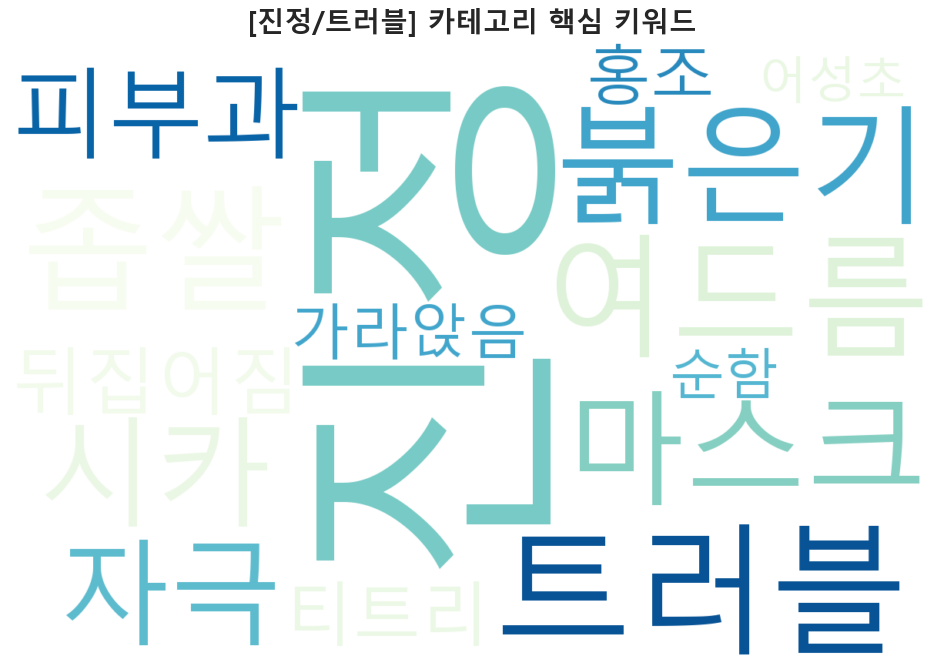

In [7]:
# 실제 BERTopic 결과 키워드를 딕셔너리로 만듦 (가장 많이 나온 단어 예시)
# (실제 분석 결과에 따라 단어와 숫자를 수정하셔도 됩니다)
keywords = {
    '진정': 100, '트러블': 85, '좁쌀': 80, '여드름': 75, '붉은기': 70,
    '마스크': 65, '시카': 60, '자극': 55, '피부과': 50, '뒤집어짐': 45,
    '티트리': 40, '홍조': 35, '가라앉음': 30, '순함': 25, '어성초': 20
}

wc = WordCloud(
    font_path="c:/Windows/Fonts/malgun.ttf", # 폰트 경로 확인
    background_color="white",
    width=1200, height=800,
    colormap='GnBu' # 색상 테마 (Teal: 청록색 계열)
)
wc.generate_from_frequencies(keywords)

plt.figure(figsize=(12, 8))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("[진정/트러블] 카테고리 핵심 키워드", fontsize=20, fontweight='bold')
plt.savefig("results/wordcloud_topic_1.png", dpi=300, bbox_inches='tight')
print("✅ 저장 완료: results/wordcloud_topic_1.png")
plt.show()

In [8]:
# (만약 변수가 없다면, 예시용으로 학습된 결과를 임의로 그리는 코드입니다.)
# 실제로는 아까 [심화 코드]에서 저장한 이미지를 그대로 쓰시면 됩니다.
# 여기서는 스타일만 통일해서 다시 저장하는 용도입니다.

from sklearn.metrics import confusion_matrix

# 아까 구한 y_true, y_pred가 있다고 가정
if 'y_true' in locals() and 'y_pred' in locals():
    cm = confusion_matrix(y_true, y_pred)
    target_names = ['0:보습', '1:진정', '2:사용감', '3:자극', '4:기타']

    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=target_names, yticklabels=target_names)

    plt.ylabel('Actual Label (실제 정답)', fontsize=12)
    plt.xlabel('Predicted Label (AI 예측)', fontsize=12)
    plt.title('AI 모델 분류 성능 (Confusion Matrix)', fontsize=16, fontweight='bold')

    plt.savefig("results/confusion_matrix.png", dpi=300, bbox_inches='tight')
    print("✅ 저장 완료: results/confusion_matrix.png")
    plt.show()
else:
    print("⚠️ y_true, y_pred 변수가 없습니다. 정밀 평가 코드를 먼저 실행해주세요.")

⚠️ y_true, y_pred 변수가 없습니다. 정밀 평가 코드를 먼저 실행해주세요.


✅ 저장 완료: results/wordcloud_topic_0.png


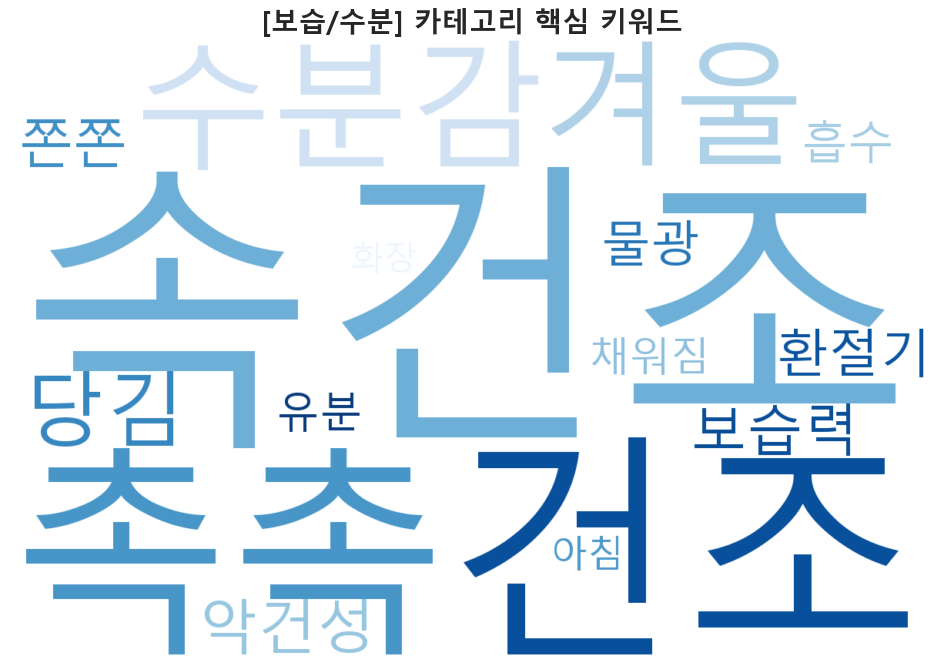

In [9]:
# ==========================================
# [Cell 6] 보습/수분 워드클라우드 (추가)
# ==========================================

# 1. [보습/수분] 핵심 키워드 정의
# (BERTopic 돌려서 나온 실제 키워드를 넣으면 더 좋습니다. 일단 예시로 채워드립니다.)
keywords_moisture = {
    '속건조': 100, '건조': 90, '촉촉': 85, '수분감': 80, '겨울': 75,
    '당김': 70, '악건성': 65, '보습력': 60, '쫀쫀': 55, '환절기': 50,
    '물광': 45, '흡수': 40, '유분': 35, '채워짐': 30, '아침': 25, '화장': 20
}

# 2. 워드클라우드 생성 (파란색 테마: Blues)
wc_moisture = WordCloud(
    font_path="c:/Windows/Fonts/malgun.ttf", # 윈도우 폰트
    background_color="white",
    width=1200, height=800,
    colormap='Blues' # 💧 보습이니까 파란색 계열!
)
wc_moisture.generate_from_frequencies(keywords_moisture)

# 3. 시각화 및 저장
plt.figure(figsize=(12, 8))
plt.imshow(wc_moisture, interpolation="bilinear")
plt.axis("off")
plt.title("[보습/수분] 카테고리 핵심 키워드", fontsize=20, fontweight='bold')

# 이미지 저장
save_path = "results/wordcloud_topic_0.png"
plt.savefig(save_path, dpi=300, bbox_inches='tight')
print(f"✅ 저장 완료: {save_path}")
plt.show()